<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/C_Image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the dataset: [Drive](https://drive.google.com/drive/folders/1hJZz_38WXWLoeJ15gOTZUs1j4z0Q60bf?usp=sharing)

To create more images for our train set, we transform images.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datasets")
os.listdir()

['spoon_train',
 'teddy_bear_train',
 'apple_train',
 'umbrella_train',
 'bowl_train']

In [162]:
datadir = "/content/drive/MyDrive/Colab Notebooks/Datasets"

In [163]:
CATEGORIES = ['spoon_train','teddy_bear_train','apple_train','umbrella_train','bowl_train']

In [164]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Print one image from training set**

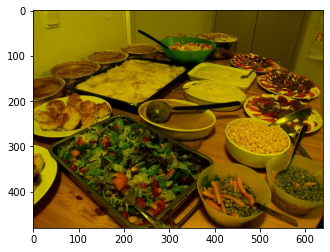

In [175]:
for category in CATEGORIES:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_BGR = cv2.imread(os.path.join(path,img))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        plt.imshow(img_RGB)
        break 
    break

In [168]:
print(img_RGB[:2])

[[[156 143   3]
  [155 142   2]
  [156 143   2]
  ...
  [ 93  81   0]
  [ 98  85   6]
  [ 86  73   0]]

 [[156 143   3]
  [153 140   0]
  [154 141   0]
  ...
  [ 94  82   0]
  [ 96  84   2]
  [ 90  77   0]]]


In [169]:
print(img_RGB.shape)

(480, 640, 3)


**Transform one image using Albumentations**

In [ ]:
!pip install -U albumentations

In [170]:
import albumentations as A
import random

In [171]:
x=[]
y=[]
for category in CATEGORIES:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_BGR = cv2.imread(os.path.join(path,img))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        x.append(img_RGB.shape[0])
        y.append(img_RGB.shape[1])

In [172]:
import statistics
print(statistics.mean(x))
print(statistics.mean(y))

480.29
585.01


In [231]:
transform = A.Compose([
    A.RandomScale(scale_limit=0.1, p=0.3),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.9,p=0.2),
    A.Blur(blur_limit=20,p=0.3),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),
    A.Transpose(p=0.4),
    A.HueSaturationValue(p=0.5)
])

*Test on the previous image*

In [177]:
def visualize(image):
    plt.figure(figsize=(4, 5))
    plt.axis('off')
    plt.imshow(image)

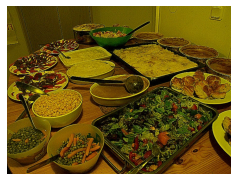

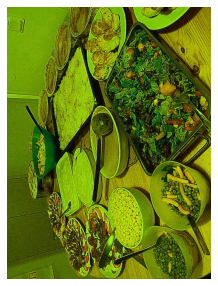

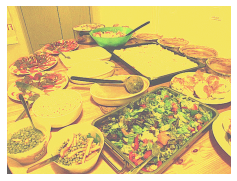

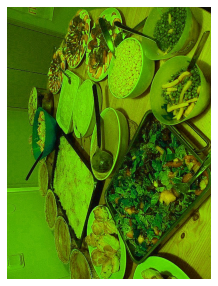

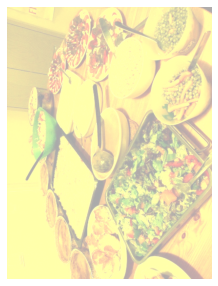

In [232]:
for i in range(5):
  random.seed(i)
  transformed = transform(image=img_RGB)
  transformed_array = transformed['image']
  visualize(transformed_array)

Array and shape of the 1st image

In [233]:
for i in range(5):
  random.seed(i)
  transformed = transform(image=img_RGB) #dict
  transformed_array = transformed["image"] #array
  print(transformed_array[:2])
  print(transformed_array.shape)
  break

[[[ 42  29   0]
  [103  90  24]
  [ 64  54   0]
  ...
  [138 125   7]
  [132 121   4]
  [138 127   9]]

 [[ 63  50   0]
  [ 92  83   6]
  [ 71  61   0]
  ...
  [130 117   0]
  [125 114   0]
  [140 129   9]]]
(480, 640, 3)


**Create training dataset**

*Assign index to each category*

In [234]:
for category in CATEGORIES:
    path = os.path.join(datadir,category)
    class_ids = CATEGORIES.index(category)
    print(f"{category} : {class_ids} ")

spoon_train : 0 
teddy_bear_train : 1 
apple_train : 2 
umbrella_train : 3 
bowl_train : 4 


*Create training dataset*

In [309]:
training_data = []
new_array = []
i=0
width = 600
height = 480
for category in CATEGORIES:
      path = os.path.join(datadir,category) 
      class_ids = CATEGORIES.index(category)
      for img in os.listdir(path):
        img_BGR = cv2.imread(os.path.join(path,img))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        new_array.append(img_RGB) #include the original image
        for i in range(2):
                random.seed(i)
                transformed = transform(image=img_RGB) #dict
                transformed_array = transformed['image'] #array
                new_array.append(transformed_array) #include the new transformed image
                training_data.append([new_array, class_ids]) #include class id

print(len(training_data))

200


We have 200 samples for training dataset.

We have 5 categories, and each category has 20 samples * 2 transformations.

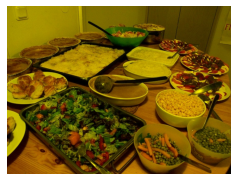

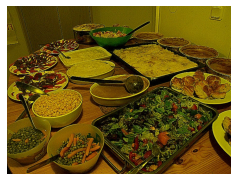

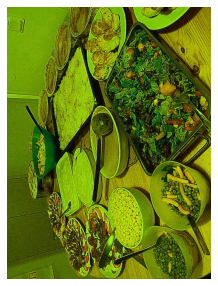

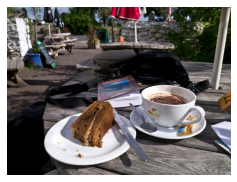

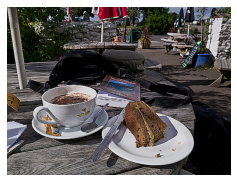

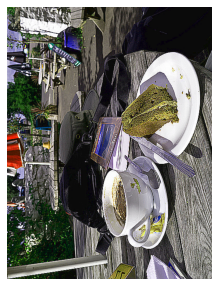

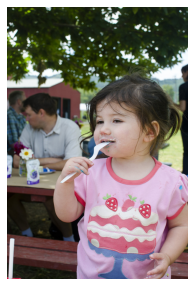

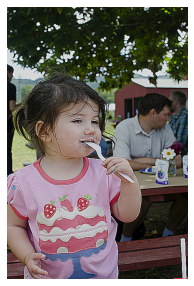

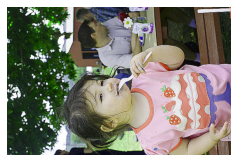

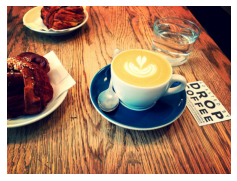

In [310]:
for sample in new_array[:10]:
  visualize(sample)

In [311]:
print("Class ids:")
for sample in training_data[:10]:
  print(sample[1]) #sample is a list, 0: array, 1: class_ids

Class ids:
0
0
0
0
0
0
0
0
0
0


**Random shuffle the training dataset**

In [312]:
from random import Random

In [335]:
random.seed(42)
random.shuffle(training_data)
print("Class ids:")
for sample in training_data[:10]:
  print(sample[1])

Class ids:
2
3
1
1
0
2
4
1
0
1


In [336]:
random.seed(42)
random.shuffle(training_data)
print("Class ids:")
for sample in training_data[:10]:
  print(sample[1])

Class ids:
1
2
3
3
2
1
3
1
1
3
